Abrimos el archivo y comprobamos que el conteo de "0 F" está bien hecho

In [ ]:
import csv

# This function reads the csv file and verifies the calculations of columns 22 and 23.
def verify_calculations(file_path):
    with open(file_path, mode='r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader, None)  # Skip header row if there is one.
        for row in reader:
            #print (row)
            # Count '0 F' values in columns 2-15 and 16-21
            count_2_15 = row[1:15].count('0 F')
            count_16_21 = row[15:21].count('0 F')

            # Retrieve values from columns 22 and 23
            column_22_value = int(row[21])
            column_23_value = int(row[22])

            # Check if calculations are correct
            if count_2_15 != column_22_value or count_16_21 != column_23_value:
                return False
        return True

# Example CSV file path
csv_file_path = 'TablaAllHerrero.csv'

# Verify calculations
# Note: Replace the 'csv_file_path' with the actual path of the CSV file.
is_correct = verify_calculations(csv_file_path)

# Print result
print(f"Calculations are {'correct' if is_correct else 'incorrect'}")



Calculations are correct


Hacemos la tabla con los porcentajes de valores "O F" etc...

In [ ]:
pip install openpyxl

Test de diferencias significativas entre porcentajes de valores:
[427 376 91 2]
[268 552 73 3]
[[427, 376, 91, 2], [268, 552, 73, 3]]
P-value A 1.6474497478904777e-15
[195 189 0 0]
[119 264 1 0]
[[195, 189, 0], [119, 264, 1]]
P-value AA 1.2361901004174456e-07
Puntuaciones 3.3495190540849866e-13 4.3731467608708145e-11
Fallos Nivel A 8.23694384443487e-09 8.402930714237264e-08
Fallos Nivel AA 3.5649866462600885e-10 4.631783580713926e-09


<Figure size 1000x600 with 0 Axes>

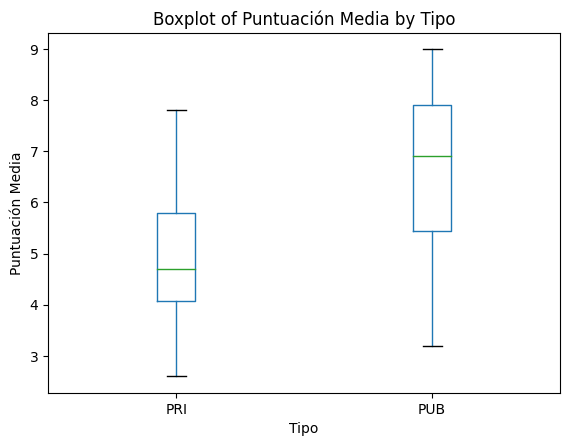

Statistics for 'Puntuación Media' for 'PRI':
count    64.000000
mean      4.767188
std       1.223974
min       2.600000
25%       4.075000
50%       4.700000
75%       5.800000
max       7.800000
Name: Puntuación Media, dtype: float64

Statistics for 'Puntuación Media' for 'PUB':
count    64.000000
mean      6.757812
std       1.527609
min       3.200000
25%       5.450000
50%       6.900000
75%       7.900000
max       9.000000
Name: Puntuación Media, dtype: float64


<Figure size 1000x600 with 0 Axes>

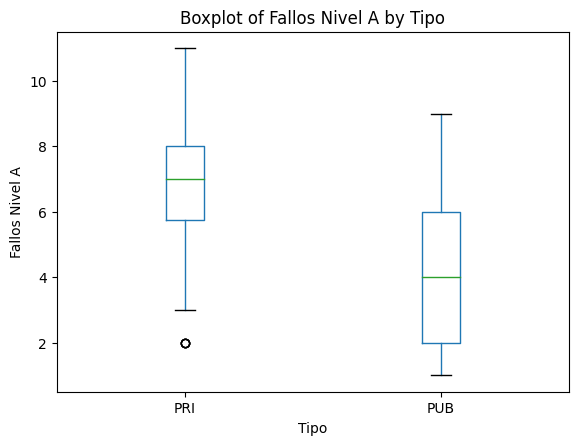

Statistics for 'Fallos Nivel A' for 'PRI':
count    64.000000
mean      6.671875
std       2.123599
min       2.000000
25%       5.750000
50%       7.000000
75%       8.000000
max      11.000000
Name: Fallos Nivel A, dtype: float64

Statistics for 'Fallos Nivel A' for 'PUB':
count    64.000000
mean      4.187500
std       2.416051
min       1.000000
25%       2.000000
50%       4.000000
75%       6.000000
max       9.000000
Name: Fallos Nivel A, dtype: float64


<Figure size 1000x600 with 0 Axes>

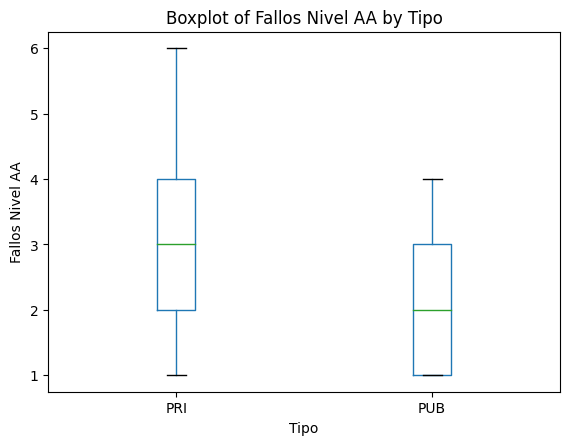

Statistics for 'Fallos Nivel AA' for 'PRI':
count    64.000000
mean      3.046875
std       1.075406
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: Fallos Nivel AA, dtype: float64

Statistics for 'Fallos Nivel AA' for 'PUB':
count    64.000000
mean      1.859375
std       0.888501
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Fallos Nivel AA, dtype: float64


In [ ]:

import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt

def create_summary_table_and_total(file_path, output_excel_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path, delimiter=';')

    # Get the original column names for columns 2 to 21
    original_column_names = df.columns[1:21].tolist()

    # Initialize the summary DataFrame
    summary_df = pd.DataFrame()

    # Iterate over the columns to populate the summary DataFrame
    for col_name in original_column_names:
        col_data = df[col_name]
        counts = col_data.value_counts().reindex(["0 F", "1 P", "- P", "0.5 P"], fill_value=0)
        counts_pri = df.loc[df.iloc[:, -1] == 'PRI', col_name].value_counts().reindex(["0 F", "1 P", "- P", "0.5 P"], fill_value=0)
        counts_pub = df.loc[df.iloc[:, -1] == 'PUB', col_name].value_counts().reindex(["0 F", "1 P", "- P", "0.5 P"], fill_value=0)

        summary_row = pd.Series([col_name] + counts.tolist() + counts_pri.tolist() + counts_pub.tolist(), index=["Column Name", "0 F", "1 P", "- P", "0.5 P", "0 F PRI", "1 P PRI", "- P PRI", "0.5 P PRI", "0 F PUB", "1 P PUB", "- P PUB", "0.5 P PUB"])
        summary_df = pd.concat([summary_df, summary_row.to_frame().T])

    # Add a total row at the end using concat
    total_row = summary_df.select_dtypes(include=['number']).sum()
    total_row = summary_df.sum()
    #print(summary_df.sum())
    total_row['Column Name'] = "Total"
    summary_df = pd.concat([summary_df, total_row.to_frame().T], ignore_index=True)

    # Save the summary DataFrame to an Excel file
    #summary_df.to_excel(output_excel_path, index=False)

    return summary_df

def insert_sum_rowA(df):
    # Calculate the sum of the first 14 rows for each column, skipping the first column of titles
    sum_data = df.iloc[:14, 1:].sum()
    # Create a series with the sum data, setting the title column to some appropriate value like 'Sum'
    sum_row = pd.Series(['Total A'] + sum_data.tolist(), index=df.columns)
    # Insert the sum row into the original DataFrame at the 15th position (index 14)
    df = pd.concat([df.iloc[:14], pd.DataFrame([sum_row]), df.iloc[14:]]).reset_index(drop=True)
    return df

def insert_sum_rowAA(df):
    sum_data = df.iloc[15:21, 1:].sum()
    sum_row = pd.Series(['Total AA'] + sum_data.tolist(), index=df.columns)
    # Insert the sum row into the original DataFrame at the 15th position (index 14)
    df = pd.concat([df.iloc[:21], pd.DataFrame([sum_row]), df.iloc[21:]]).reset_index(drop=True)
    return df

def create_percentage_df(df):
    # Copy the title column as is
    percentage_df = pd.DataFrame(df.iloc[:, 0])

    # Process the groups of four columns
    for i in range(1, df.shape[1] - 2, 4):  # Adjusting the range to exclude the last three columns
        # Select the group of four columns
        cols = df.iloc[:, i:i+4]
        # Calculate the sum across the four columns for each row
        sums = cols.sum(axis=1)
        # Calculate the percentage
        percentages = cols.divide(sums, axis=0) * 100
        # Append the percentages to the main DataFrame
        percentage_df = pd.concat([percentage_df, percentages], axis=1)

    # Append the last three columns as is, if needed
    # percentage_df = pd.concat([percentage_df, df.iloc[:, -3:]], axis=1)

    return percentage_df

def remove_zero_columns(contingency_table):
    # Convert the contingency table to a DataFrame for easier manipulation
    contingency_df = pd.DataFrame(contingency_table)

    # Drop columns where all values are zero
    contingency_df = contingency_df.loc[:, (contingency_df != 0).any(axis=0)]

    # Convert back to a list of lists (contingency table format) if necessary
    new_contingency_table = contingency_df.values.tolist()

    return new_contingency_table

def chi_square_test_on_row(df, row_label):
    # Find the row with the label 'Total A'
    total_a_row = df[df.iloc[:, 0] == row_label]

    # If the row is not found, return None
    if total_a_row.empty:
        return None

    # Extract the values for columns 5-8 and 9-12
    values_5_8 = total_a_row.iloc[:, 5:9].values.flatten()
    values_9_12 = total_a_row.iloc[:, 9:13].values.flatten()

    print(values_5_8)
    print(values_9_12)
    # Create a contingency table
    contingency_table = [values_5_8, values_9_12]
    contingency_table=remove_zero_columns(contingency_table)
    print (contingency_table)
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Return the p-value to check for significance
    return p


# Assuming 'df' is your DataFrame
def check_group_differences(df, columna):
    # Separate the scores for PRI and PUB
    pri_scores = df[df['Tipo'] == 'PRI'][columna]
    pub_scores = df[df['Tipo'] == 'PUB'][columna]

    # Check for equal variances
    equal_var = False if (np.var(pri_scores) / np.var(pub_scores)) > 2 else True

    # Perform a t-test
    t_stat, p_ttest = ttest_ind(pri_scores, pub_scores, equal_var=equal_var)

    # Perform a Mann-Whitney U test
    u_stat, p_mannwhitney = mannwhitneyu(pri_scores, pub_scores)

    # Return both p-values
    return p_ttest, p_mannwhitney

def plot_boxplot(df, columna):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=columna, by='Tipo', grid=False)
    plt.title('Boxplot of '+columna+' by Tipo')
    plt.suptitle('')  # Suppress the default title
    plt.xlabel('Tipo')
    plt.ylabel(columna)
    plt.show()

    # Calculate and print the statistics for 'Puntuación Media' for each 'Tipo'
    stats_pri = df[df['Tipo'] == 'PRI'][columna].describe()
    stats_pub = df[df['Tipo'] == 'PUB'][columna].describe()

    print("Statistics for '"+columna+"' for 'PRI':")
    print(stats_pri)
    print("\nStatistics for '"+columna+"' for 'PUB':")
    print(stats_pub)


# Example CSV file path and Excel output path
csv_file_path = 'TablaAllHerrero.csv'
output_excel_path = 'tabla1.xlsx'
output_excel_path_perc = 'tablaPerc1.xlsx'
summary_table_with_total = create_summary_table_and_total(csv_file_path, output_excel_path)
# Añade los totales para A y para AA
summary_table_with_total=insert_sum_rowA(summary_table_with_total)
summary_table_with_total=insert_sum_rowAA(summary_table_with_total)
summary_table_with_total.to_excel(output_excel_path)
summary_table_with_total_perc = create_percentage_df(summary_table_with_total)
summary_table_with_total_perc.to_excel(output_excel_path_perc)

#Extrae la fila ton Total A y con Total AA para PUB y para PRI
print ("Test de diferencias significativas entre porcentajes de valores:")
p_value = chi_square_test_on_row(summary_table_with_total, 'Total A')
print ("P-value A", p_value)
p_value = chi_square_test_on_row(summary_table_with_total, 'Total AA')
print ("P-value AA", p_value)
# You can now compare the p-value against your significance level to draw conclusions.

# Diferencias de las calificaciones
df = pd.read_csv(csv_file_path, delimiter=';')
p_ttest, p_mannwhitney = check_group_differences(df,'Puntuación Media')
print( "Puntuaciones",p_ttest, p_mannwhitney)
p_ttest, p_mannwhitney = check_group_differences(df,'Fallos Nivel A')
print( "Fallos Nivel A",p_ttest, p_mannwhitney)
p_ttest, p_mannwhitney = check_group_differences(df,'Fallos Nivel AA')
print( "Fallos Nivel AA", p_ttest, p_mannwhitney)

plot_boxplot(df,'Puntuación Media')
plot_boxplot(df,'Fallos Nivel A')
plot_boxplot(df,'Fallos Nivel AA')






